Once darkCNN has been run this can be run to look at some results.

In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
import glob
import darkCNN
import numpy as np
from matplotlib import pyplot as plt

Get the training and test samples 

In [4]:
trainingSet, testSet = darkCNN.getData( nChannels=1, allDataFile='exampleCNN.pkl')

Number of Samples in the Test Set is 240


Plot some examples of the dataset

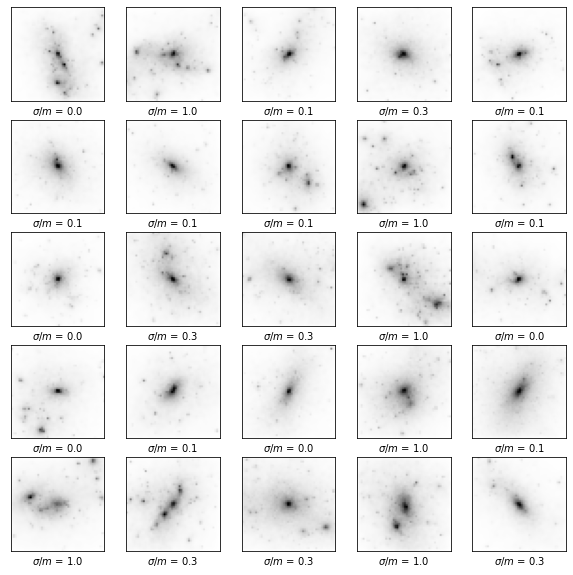

In [5]:
nClasses = len(np.unique(trainingSet['label']))
inputShape = trainingSet['images'].shape[1:]
plt.figure(figsize=(10,10))
for j in range(25):
    i = np.random.randint(0, trainingSet['images'].shape[0])
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainingSet['images'][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.xlabel(r"$\sigma/m$ = %s" % trainingSet['label'][i][0])
plt.show()

In [6]:
augmentedTrain, augmentedLabels = darkCNN.augmentData( trainingSet['images'], trainingSet['label'])

Plot the predictions

Number of Samples in the Test Set is 240
Number of Samples in the Test Set is 240


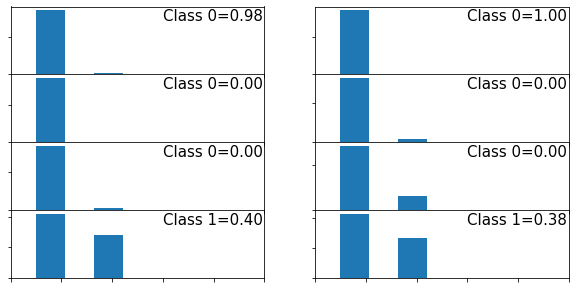

In [34]:
nMonte = np.int32(len(glob.glob('pickles/example*.h5')))
fig, ax = plt.subplots(4,nMonte, figsize=(5*nMonte,5))

for iMonte in range(nMonte):
    
    trainingSet, testSet = darkCNN.getData( allDataFile='exampleCNN.pkl', \
                                           indexFileRoot='pickles/testIndexes_%i' % (iMonte + 1 ))
    
    modelName = "pickles/exampleNew_%i.h5" % (iMonte +1)
        
    mertensModel = darkCNN.models.load_model(modelName)

    prediction = np.argmax(mertensModel.predict(testSet['images']),axis=1)

    for axis, i in enumerate(np.unique(augmentedLabels)):
        ax[axis, iMonte].hist(prediction[testSet['label'][:,0]==i], bins=np.linspace(-0.5,3.5,8), density=True)
        ax[axis, iMonte].set_xlim(-1,4)
        acc = np.where(prediction[testSet['label'][:,0]==i]==i)[0].shape[0]/prediction[testSet['label'][:,0]==i].shape[0]
        ax[axis, iMonte].text(0.6, 0.8, "Class %i=%0.2f" % (i,acc), transform=ax[axis,iMonte].transAxes, fontsize=15)
        if i != len(ax)-1:
            ax[axis, iMonte].set_xticklabels([])
            ax[axis, iMonte].set_yticklabels([])
    
fig.subplots_adjust(hspace=0)

The loss and accuracy for the training and test samples

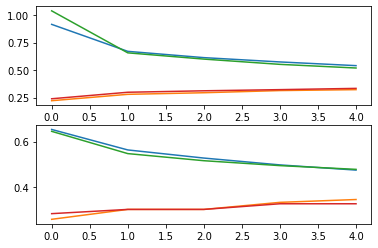

In [29]:
fig, ax = plt.subplots( 2, 1)
ax[1].set_xlabel('Epoch')
for iMonte in range(1, nMonte):
    epoch, accuracy, loss, val_accuracy, val_loss = \
        np.loadtxt( "pickles/exampleNew_%i.csv" % iMonte, delimiter=',',skiprows=1,unpack=True)
    ax[0].plot( epoch, loss )
    ax[0].plot( epoch, accuracy )
    ax[1].plot( epoch, val_loss )
    ax[1].plot( epoch, val_accuracy )
    